In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


In [19]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [32]:
X = df['review'].values
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Define max number of words to consider and max sequence length
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

Tokenizing: Converts each review into a sequence of numbers, where each number corresponds to a word from the tokenizer's vocabulary.

In [21]:
# Convert text into sequences of numbers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

Padding: Ensures that all sequences are of the same length (max_len=100). If a sequence is shorter than 100 words, it adds padding.

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_pad, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 260s 519ms/step - accuracy: 0.9391 - loss: 0.1656 - val_accuracy: 0.8791 - val_loss: 0.3112
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 227s 454ms/step - accuracy: 0.9531 - loss: 0.1271 - val_accuracy: 0.8737 - val_loss: 0.3610
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 256s 442ms/step - accuracy: 0.9698 - loss: 0.0873 - val_accuracy: 0.8769 - val_loss: 0.3988
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 264s 446ms/step - accuracy: 0.9723 - loss: 0.0799 - val_accuracy: 0.8749 - val_loss: 0.4847


In [23]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step
Test Accuracy: 0.8792


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      4961
           1       0.85      0.92      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



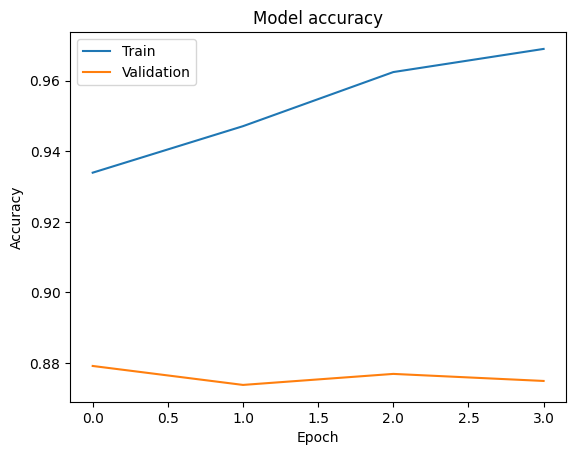

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

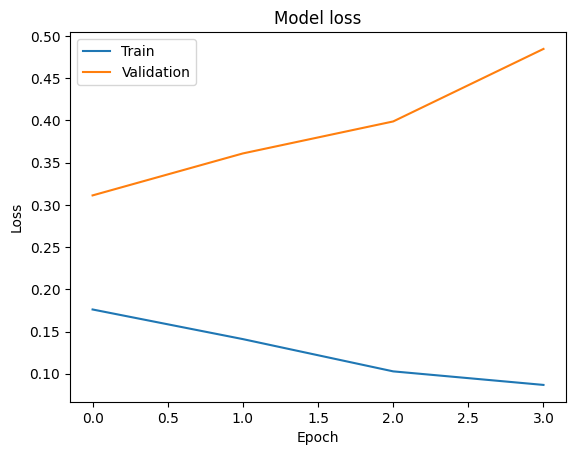

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
def predict_sentiment(text):
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_len)
    prediction = model.predict(text_pad)[0][0]

    if prediction > 0.5:
        print(f"Sentiment: Positive (Confidence: {prediction:.2f})")
    else:
        print(f"Sentiment: Negative (Confidence: {prediction:.2f})")

text = input("Enter your review: ")
predict_sentiment(text)

Enter your review: bahubali is a great movie to watch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Sentiment: Positive (Confidence: 0.90)
